In [5]:
import pandas, numpy
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

## functions & options


In [6]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [7]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# 1) Huh7

In [8]:
%%time
path = input_file_directory + "mef_huh7_interactome/interact_huh7_iso1vs2.csv"
df_huh7= pandas.read_csv(path, sep = ",")
print(df_huh7.shape)
df_huh7.head()

(21, 9)
Wall time: 2.99 ms


,adj.pvalue,Bait,BaitBoolean,log2FC,name,Prey,PreyGene,selected,shared name
0,0.000000,NaN,False,-10.000000,DNAJB12,Q9NXW2,DJB12_HUMAN,False,DNAJB12
1,0.000000,NaN,False,10.000000,ATG12,O94817,ATG12_HUMAN,False,ATG12
2,0.003144,NaN,False,9.421296,GABARAP,O95166,GBRAP_HUMAN,False,GABARAP
3,0.000195,NaN,False,5.333772,GABARAPL2,P60520,GBRL2_HUMAN,False,GABARAPL2
4,0.002939,NaN,False,1.601515,GABARAPL1,Q9H0R8,GBRL1_HUMAN,False,GABARAPL1


In [9]:
#select columns:
df_huh7 = df_huh7[['name', 'log2FC',  'adj.pvalue']]
#add a small value to not have 'infinite'
df_huh7['adj.pvalue'] = df_huh7['adj.pvalue']+0.0001
#do a -log10(Pvalue)
df_huh7['log10_pvalue'] = numpy.log10(1/df_huh7['adj.pvalue'])

#drop NAN
df_huh7 = df_huh7.dropna(axis=0)
print(len(df_huh7))
#Only keep pvalue <0.3
df_huh7 = df_huh7[df_huh7['adj.pvalue']<0.05]
print(len(df_huh7))
df_huh7.head()

21
18


,name,log2FC,adj.pvalue,log10_pvalue
0,DNAJB12,-10.000000,0.000100,4.000000
1,ATG12,10.000000,0.000100,4.000000
2,GABARAP,9.421296,0.003244,2.488862
3,GABARAPL2,5.333772,0.000295,3.529520
4,GABARAPL1,1.601515,0.003039,2.517289


In [10]:
#select columns:
df_huh7 = df_huh7[['name', 'log2FC',  'adj.pvalue']]
#rename
df_huh7 = df_huh7.rename(columns = {'adj.pvalue' : 'adj_pvalue'})
#add a small value to not have 'infinite'
df_huh7 = df_huh7.assign(adj_pvalue = df_huh7['adj_pvalue']+0.0001)
df_huh7 = df_huh7.assign(log10_pvalue = numpy.log10(1/df_huh7['adj_pvalue']))
          
#drop NAN
df_huh7 = df_huh7.dropna(axis=0)
print(len(df_huh7))
#Only keep pvalue <0.3
df_huh7 = df_huh7[df_huh7['adj_pvalue']<0.05]
print(len(df_huh7))
df_huh7.head()

18
18


,name,log2FC,adj_pvalue,log10_pvalue
0,DNAJB12,-10.000000,0.000200,3.698970
1,ATG12,10.000000,0.000200,3.698970
2,GABARAP,9.421296,0.003344,2.475679
3,GABARAPL2,5.333772,0.000395,3.402911
4,GABARAPL1,1.601515,0.003139,2.503228


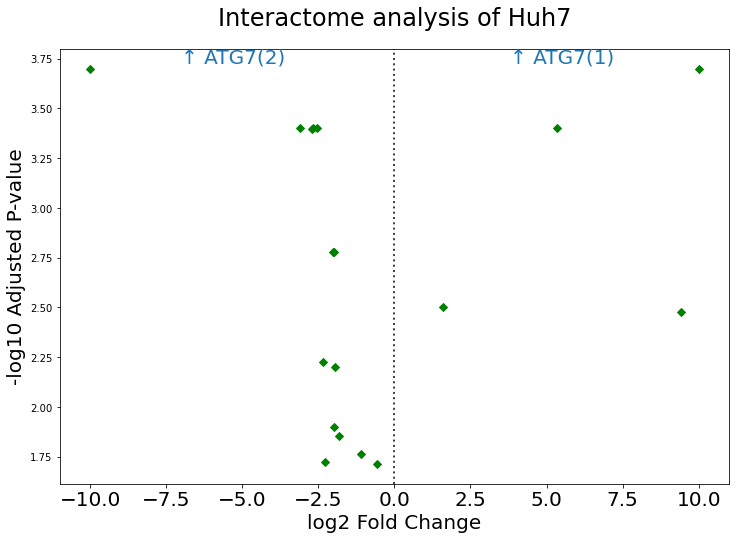

In [12]:
#Graph
x = df_huh7['log2FC']
y = df_huh7['log10_pvalue']

plt.plot(x, y, 'D', color= 'green')
plt.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')
plt.text(-7, 3.73, '↑ ATG7(2)', color='tab:blue')
plt.text(3.8, 3.73, '↑ ATG7(1)', color='tab:blue')

plt.ylabel('-log10 Adjusted P-value')
plt.xlabel('log2 Fold Change')
plt.title('Interactome analysis of Huh7', y=1.04)

#save to csv
path = 'ATG7/mef_huh7_interactome/'
plt.savefig(output_file_directory+path+'HUH7_interactome_plot.svg')

In [19]:
df_huh7.sort_values(['log2FC'], ascending = False)

,name,log2FC,adj_pvalue,log10_pvalue
1,ATG12,10.000000,0.000100,4.000000
2,GABARAP,9.421296,0.003244,2.488862
3,GABARAPL2,5.333772,0.000295,3.529520
4,GABARAPL1,1.601515,0.003039,2.517289
6,ARFGAP1,-0.575691,0.019250,1.715559
8,UMPS,-1.091337,0.017074,1.767669
9,HK2,-1.831174,0.013833,1.859084
10,TMEM126A,-1.935586,0.006226,2.205814
11,HSPBP1,-1.973084,0.012487,1.903555
12,AJUBA,-1.998967,0.001568,2.804790


# 2) Mefs

In [ ]:
%%time
path = input_file_directory + "mef_huh7_interactome/interact_mef_iso1vs2.csv"
df_mef= pandas.read_csv(path, sep = ",")
print(df_mef.shape)
df_mef.head()

In [22]:
#select columns:
df_mef = df_mef[['name', 'log2FC',  'adj.pvalue']]
#rename
df_mef = df_mef.rename(columns = {'adj.pvalue' : 'adj_pvalue'})
#add a small value to not have 'infinite' and log10
df_mef = df_mef.assign(adj_pvalue = df_mef['adj_pvalue']+0.0001)
df_mef = df_mef.assign(log10_pvalue = numpy.log10(1/df_mef['adj_pvalue']))

#drop NAN
df_mef = df_mef.dropna(axis=0)
print(len(df_mef))
#Only keep pvalue <0.3
df_mef = df_mef[df_mef['adj_pvalue']<0.06]
print(len(df_mef))

45
41


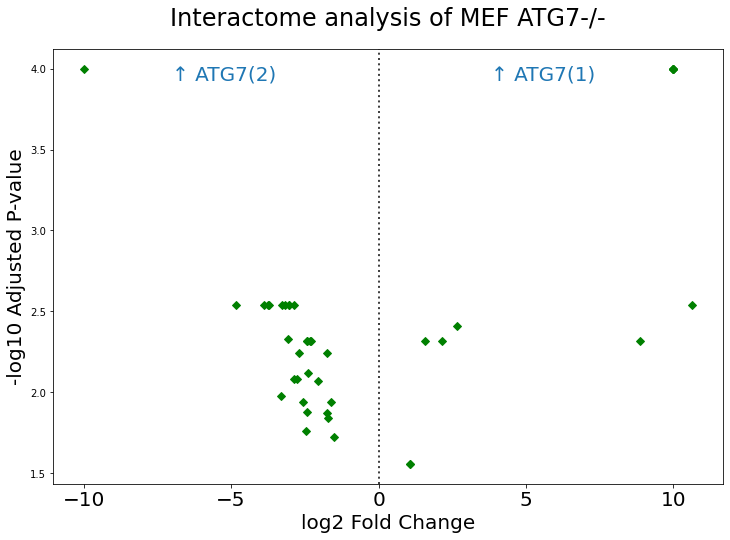

In [23]:
#Graph
x = df_mef['log2FC']
y = df_mef['log10_pvalue']

plt.plot(x, y, 'D', color= 'green')
plt.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')
plt.text(-7, 3.93, '↑ ATG7(2)', color='tab:blue')
plt.text(3.8, 3.93, '↑ ATG7(1)', color='tab:blue')

plt.ylabel('-log10 Adjusted P-value')
plt.xlabel('log2 Fold Change')
plt.title('Interactome analysis of MEF ATG7-/-', y=1.04)

#save to csv
path = 'ATG7/mef_huh7_interactome/'
plt.savefig(output_file_directory+path+'MEFs_interactome_plot.svg')

In [24]:
df_mef.sort_values(['log2FC'], ascending = False)

,name,log2FC,adj_pvalue,log10_pvalue
3,Gabarap,10.640435,0.002908,2.536442
18,NATD1,10.000000,0.000100,4.000000
4,Atg12,10.000000,0.000100,4.000000
7,Map1lc3b,10.000000,0.000100,4.000000
8,Gabarapl1,10.000000,0.000100,4.000000
19,Aspn,10.000000,0.000100,4.000000
1,Map1lc3a,8.849758,0.004859,2.313461
5,Atg3,2.666988,0.003895,2.409514
6,Atg10,2.155772,0.004859,2.313461
0,Nek7,1.568494,0.004859,2.313461
